In [1]:
import pandas as pd
import numpy as npx
import seaborn as sea
import matplotlib as mat
import matplotlib.pyplot as plt

In [2]:
# Primeiro importamos um dataset
dsa_df = pd.read_csv("career_nub.gender_data.csv")

In [3]:
dsa_df.head()

,category,indicator,country,value,year
0,Access to technology,Used the internet to buy something online in t...,Afghanistan,0.059951,2017.0
1,Access to technology,Used the internet to buy something online in t...,Albania,5.408209,2017.0
2,Access to technology,Used the internet to buy something online in t...,Algeria,1.665455,2017.0
3,Access to technology,Used the internet to buy something online in t...,Argentina,11.233432,2017.0
4,Access to technology,Used the internet to buy something online in t...,Armenia,6.978662,2017.0


---

# Total Female Population per Year

In [5]:
#Paso 1: filtrar los datos de la columna 'indicator' en donde los datos sean iguales a 'Population, female'
filter_df_female = dsa_df[ (dsa_df['indicator'] == 'Population, female') ]
#Paso 2: Hacer un group by en donde sume los valores filtrador agregando una columna total_female_population por año
filtered = filter_df_female.groupby('year', as_index=False).agg(total_female_population = ('value','sum'))

filtered.head(10)

,year,total_female_population
0,2012.0,3.494372e+09
1,2013.0,3.537048e+09
2,2014.0,3.579809e+09
3,2015.0,3.622266e+09
4,2016.0,3.664684e+09
5,2017.0,3.706895e+09
6,2018.0,3.747927e+09
7,2019.0,3.787896e+09
8,2020.0,3.827501e+09


<BarContainer object of 9 artists>

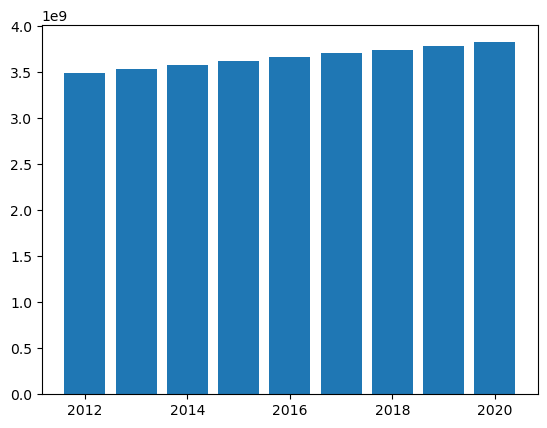

In [5]:
plt.bar(filtered['year'], filtered['total_female_population'], width=0.8)

# Yearly total and % of female population across all countries

In [132]:
#Paso 1: filtrar los indicadores 'Population, female' y 'Population, male'
filter_population = dsa_df[(dsa_df['indicator'].isin(['Population, female','Population, male']))].groupby(['year','indicator'], as_index=False).agg(value = ('value','sum'))

In [133]:
#Paso 2: Crear una pivot table para tener en columnas 'Population, female' y 'Population, male'
pivot_table = filter_population.pivot_table(index='year', columns='indicator', values='value')
#Paso 3: Crear una columna nueva para calcular total_population sumando los valores de 'Population, female' y 'Population, male'
pivot_table = pivot_table.assign(total_population=pivot_table['Population, female'] + pivot_table['Population, male'])
#Paso 4: Crear una columna nueva para calcular female_percentage 
pivot_table = pivot_table.assign(female_percentage=pivot_table['Population, female'] / pivot_table['total_population'] * 100)

In [134]:
#Paso 5: Seleccionar las columas que se desean ver
pivot_table[['Population, female', 'Population, male', 'total_population', 'female_percentage']]

indicator,"Population, female","Population, male",total_population,female_percentage
year,,,,
2012.0,3.494372e+09,3.553833e+09,7.048205e+09,49.578180
2013.0,3.537048e+09,3.597032e+09,7.134080e+09,49.579600
2014.0,3.579809e+09,3.640298e+09,7.220106e+09,49.581107
2015.0,3.622266e+09,3.683347e+09,7.305613e+09,49.581963
2016.0,3.664684e+09,3.726494e+09,7.391177e+09,49.581865
2017.0,3.706895e+09,3.769552e+09,7.476447e+09,49.580974
2018.0,3.747927e+09,3.811420e+09,7.559347e+09,49.580034
2019.0,3.787896e+09,3.852119e+09,7.640015e+09,49.579696
2020.0,3.827501e+09,3.892244e+09,7.719744e+09,49.580664


# Top 5 countries with the highest percentage of the female population in the year 2020

In [11]:
filtered_table = dsa_df[(dsa_df['indicator'].isin(['Population, female', 'Population, male'])) & (dsa_df['year'] == 2020)].groupby(['year','indicator','country'], as_index=False).agg(value = ('value','sum'))

In [13]:
pivot_table = filtered_table.pivot_table(index=['year','country'], columns='indicator', values='value')
pivot_table = pivot_table.assign(total_population=pivot_table['Population, female'] + pivot_table['Population, male'])
pivot_table = pivot_table.assign(female_percentage=pivot_table['Population, female'] / pivot_table['total_population'] * 100)
pivot_table.sort_values('female_percentage', ascending=False).head(5)


In [14]:
filtered_table.pivot_table(index=['year','country'], columns='indicator', values='value')

indicator                   Population, female  Population, male
year   country                                                  
2020.0 Afghanistan                  18952076.0        19976265.0
       Albania                       1393469.0         1444380.0
       Algeria                      21697235.0        22153808.0
       Angola                       16605398.0        16260870.0
       Antigua and Barbuda             50659.0           47269.0
...                                        ...               ...
       Venezuela, RB                14451011.0        13984932.0
       Vietnam                      48740329.0        48598254.0
       Yemen, Rep.                  14800983.0        15024985.0
       Zambia                        9280950.0         9103006.0
       Zimbabwe                      7770917.0         7092010.0

[179 rows x 2 columns]

# Which country had the highest sex ratio at birth in 2020?

In [137]:
dsa_df[dsa_df['indicator'] == 'Sex ratio at birth (male births per female births)'].sort_values('value', ascending=False).head(1)

,category,indicator,country,value,year
7996,Demographics,Sex ratio at birth (male births per female bir...,Azerbaijan,1.158,2012.0


---

# The bottom 2 countries with the lowest adult female literacy rate in 2019

In [138]:
dsa_df[(dsa_df['indicator'] == 'Literacy rate, adult female') & (dsa_df['year'] == 2019)].sort_values('value', ascending=True).head(2)

,category,indicator,country,value,year
12980,Education,"Literacy rate, adult female",Pakistan,46.490040,2019.0
13065,Education,"Literacy rate, adult female",Togo,55.051498,2019.0


# The change in adult female literacy between 2012 and 2020 for Bangladesh

In [139]:
df = dsa_df[(dsa_df['year'].between(2012, 2019)) & (dsa_df['indicator'] == 'Literacy rate, adult female') & (dsa_df['country'] == 'Bangladesh')].copy()


In [140]:
df.loc[:, 'variation'] = df['value'].pct_change(periods=1) * 100

In [141]:
df.head(8)

,category,indicator,country,value,year,variation
12779,Education,"Literacy rate, adult female",Bangladesh,54.236038,2012.0,NaN
12780,Education,"Literacy rate, adult female",Bangladesh,57.789001,2013.0,6.550927
12781,Education,"Literacy rate, adult female",Bangladesh,57.860931,2014.0,0.124470
12782,Education,"Literacy rate, adult female",Bangladesh,62.252991,2015.0,7.590717
12783,Education,"Literacy rate, adult female",Bangladesh,69.897209,2016.0,12.279279
12784,Education,"Literacy rate, adult female",Bangladesh,70.085701,2017.0,0.269670
12785,Education,"Literacy rate, adult female",Bangladesh,71.181938,2018.0,1.564138
12786,Education,"Literacy rate, adult female",Bangladesh,71.948387,2019.0,1.076746


# The number of female children out of primary school as a percentage of overall children out of primary school in Cameroon by each year

In [157]:
filtered_data = dsa_df[(dsa_df['indicator'].isin(['Children out of school, primary, female', 'Children out of school, primary, male']))& (dsa_df['country'] == 'Cameroon')].groupby(['year','country','indicator'], as_index=False).agg(value = ('value','sum'))

In [160]:
pivot_table = filtered_data.pivot_table(index=['year','country'], columns='indicator', values='value')
pivot_table = pivot_table.assign(total_children_out_of_school = pivot_table['Children out of school, primary, female'] + pivot_table['Children out of school, primary, male'])
pivot_table = pivot_table.assign(female_out_of_school_percentage = pivot_table['Children out of school, primary, female'] / pivot_table['total_children_out_of_school'] * 100)

pivot_table.head(3)

,indicator,"Children out of school, primary, female","Children out of school, primary, male",total_children_out_of_school,female_out_of_school_percentage
year,country,,,,
2016.0,Cameroon,176603.0,15527.0,192130.0,91.918493
2017.0,Cameroon,210143.0,48680.0,258823.0,81.191780
2019.0,Cameroon,262532.0,83981.0,346513.0,75.763968


---

# Best/worst countries based on the female & male Life expectancy among SAARC countries in 2020
SAARC countries: Afghanistan, Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka

In [152]:
filtered_data = dsa_df[(dsa_df['country'].isin(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'])) & (dsa_df['indicator'].isin(['Life expectancy at birth, female', 'Life expectancy at birth, male'])) & (dsa_df['year'] == 2020)].groupby(['year', 'country', 'indicator'], as_index=False).agg(value=('value', 'sum'))

In [153]:
pivot_table = filtered_data.pivot_table(index=['year','country'], columns='indicator', values='value')
pivot_table.assign(total_life_expectancy_at_birth = pivot_table['Life expectancy at birth, female'] + pivot_table['Life expectancy at birth, male']).sort_values('total_life_expectancy_at_birth', ascending=False).head(10)

indicator           Life expectancy at birth, female  \
year   country                                         
2020.0 Maldives                               81.036   
       Sri Lanka                              80.399   
       Bangladesh                             74.893   
       Bhutan                                 72.524   
       Nepal                                  72.510   
       India                                  71.202   
       Pakistan                               68.464   
       Afghanistan                            66.744   

indicator           Life expectancy at birth, male  \
year   country                                       
2020.0 Maldives                             77.816   
       Sri Lanka                            73.779   
       Bangladesh                           71.130   
       Bhutan                               71.673   
       Nepal                                69.521   
       India                                68.678   
       Pakistan                             66.471   
       Afghanistan                          63.708   

indicator           total_life_expectancy_at_birth  
year   country                                      
2020.0 Maldives                            158.852  
       Sri Lanka                           154.178  
       Bangladesh                          146.023  
       Bhutan                              144.197  
       Nepal                               142.031  
       India                               139.880  
       Pakistan                            134.935  
       Afghanistan                         130.452

# The female and male Under-5 mortality rates in the year 2020 among SAARC countries

Indicator Names: 
- Mortality rate, under-5, female
- Mortality rate, under-5, male

In [154]:
filtered_data = dsa_df[(dsa_df['country'].isin(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'])) & (dsa_df['indicator'].isin(['Mortality rate, under-5, female', 'Mortality rate, under-5, male'])) & (dsa_df['year'] == 2020)].groupby(['year', 'country', 'indicator'], as_index=False).agg(value=('value', 'sum'))

In [155]:
filtered_data.pivot_table(index=['year','country'], columns='indicator', values='value').sort_values('Mortality rate, under-5, female', ascending=False).head(10)

indicator           Mortality rate, under-5, female  \
year   country                                        
2020.0 Pakistan                                60.5   
       Afghanistan                             54.3   
       India                                   33.0   
       Bangladesh                              27.1   
       Nepal                                   25.9   
       Bhutan                                  25.0   
       Sri Lanka                                6.3   
       Maldives                                 5.9   

indicator           Mortality rate, under-5, male  
year   country                                     
2020.0 Pakistan                              69.6  
       Afghanistan                           61.4  
       India                                 32.2  
       Bangladesh                            31.0  
       Nepal                                 30.3  
       Bhutan                                30.2  
       Sri Lanka                              7.6  
       Maldives                               7.0

# Countries with the highest prevalence of HIV among females in the age group 15-24 in the year 2020

In [19]:
dsa_df[(dsa_df['indicator'] == 'Prevalence of HIV, female (% ages 15-24)')&(dsa_df['year'] == 2020)].sort_values('value', ascending=False).head(5)

,category,indicator,country,value,year
31013,Health,"Prevalence of HIV, female (% ages 15-24)",South Africa,10.4,2020.0
30653,Health,"Prevalence of HIV, female (% ages 15-24)",Lesotho,9.0,2020.0
30185,Health,"Prevalence of HIV, female (% ages 15-24)",Botswana,8.8,2020.0
30779,Health,"Prevalence of HIV, female (% ages 15-24)",Mozambique,6.2,2020.0
31228,Health,"Prevalence of HIV, female (% ages 15-24)",Zambia,6.0,2020.0


---

# The percentage of female employment in Agriculture changed from 2012 to 2019

In [21]:
filtered_data = dsa_df[(dsa_df['year'].between(2012, 2019)) & (dsa_df['indicator'].isin(['Employment in agriculture, female', 'Population employed, female']))]

In [23]:
pivot_table = filtered_data.pivot_table(index=['year'], columns='indicator', values='value')

In [24]:
pivot_table = pivot_table.assign(percentage_of_female_in_agriculture = pivot_table['Employment in agriculture, female'] / pivot_table['Population employed, female'] * 100)

In [26]:
pivot_table.head(10)

indicator,"Employment in agriculture, female","Population employed, female",percentage_of_female_in_agriculture
year,,,
2012.0,2.861988e+06,8.824805e+06,32.431175
2013.0,2.805165e+06,8.900333e+06,31.517528
2014.0,2.745588e+06,9.000372e+06,30.505270
2015.0,2.717454e+06,9.098288e+06,29.867753
2016.0,2.684871e+06,9.188151e+06,29.221015
2017.0,2.662367e+06,9.293113e+06,28.648819
2018.0,2.628932e+06,9.400654e+06,27.965417
2019.0,2.623485e+06,9.534207e+06,27.516555


# The percentage of female employment in the industry sector changed from 2012 to 2019

In [36]:
filtered_data = dsa_df[(dsa_df['year'].between(2012, 2019)) & (dsa_df['indicator'].isin(['Employment in industry, female', 'Population employed, female']))]

In [37]:
pivot_table = filtered_data.pivot_table(index=['year'], columns='indicator', values='value')

In [38]:
pivot_table = pivot_table.assign(percentage_of_female_in_industry = pivot_table['Employment in industry, female'] / pivot_table['Population employed, female'] * 100)

In [39]:
pivot_table.head(10)

indicator,"Employment in industry, female","Population employed, female",percentage_of_female_in_industry
year,,,
2012.0,1.437764e+06,8.824805e+06,16.292303
2013.0,1.432968e+06,8.900333e+06,16.100160
2014.0,1.442196e+06,9.000372e+06,16.023737
2015.0,1.434830e+06,9.098288e+06,15.770333
2016.0,1.430110e+06,9.188151e+06,15.564723
2017.0,1.429110e+06,9.293113e+06,15.378165
2018.0,1.445533e+06,9.400654e+06,15.376942
2019.0,1.433932e+06,9.534207e+06,15.039871


# The percentage of female employment in the service sector changed from 2012 to 2019

In [33]:
filtered_data = dsa_df[(dsa_df['year'].between(2012, 2019)) & (dsa_df['indicator'].isin(['Employment in services, female', 'Population employed, female']))]
pivot_table = filtered_data.pivot_table(index=['year'], columns='indicator', values='value')
pivot_table = pivot_table.assign(percentage_of_female_in_service= pivot_table['Employment in services, female'] / pivot_table['Population employed, female'] * 100)
pivot_table.head(10)

indicator,"Employment in services, female","Population employed, female",percentage_of_female_in_service
year,,,
2012.0,4.525205e+06,8.824805e+06,51.278247
2013.0,4.662302e+06,8.900333e+06,52.383462
2014.0,4.812704e+06,9.000372e+06,53.472281
2015.0,4.946101e+06,9.098288e+06,54.362987
2016.0,5.073566e+06,9.188151e+06,55.218574
2017.0,5.201806e+06,9.293113e+06,55.974851
2018.0,5.326352e+06,9.400654e+06,56.659375
2019.0,5.476640e+06,9.534207e+06,57.442010


---

# How has the female debit card ownership changed in 2017 compared to 2014?

In [49]:
filtered_data = dsa_df[(dsa_df['year'].isin([2014, 2017])) & (dsa_df['indicator'].isin(['Debit card ownership, female, 15+', 'Population, female, 15+']))]
filtered_data.groupby(['year','indicator'], as_index=False).agg(value = ('value','sum'))
pivot_table = filtered_data.pivot_table(index=['year'], columns='indicator', values='value')
pivot_table = pivot_table.assign(percentage_of_female_in_service= pivot_table['Debit card ownership, female, 15+'] / pivot_table['Population, female, 15+'] * 100)
pivot_table.head(10)

indicator,"Debit card ownership, female, 15+","Population, female, 15+",percentage_of_female_in_service
year,,,
2014.0,6.852931e+06,1.462518e+07,46.857068
2017.0,8.397976e+06,1.522745e+07,55.150236


# The five countries with the lowest female debit card ownership in 2017

In [67]:
filtered_data = dsa_df[ (dsa_df['indicator'].isin(['Debit card ownership, female, 15+', 'Population, female, 15+'])) & (dsa_df['year'] == 2017)]
filtered_data.groupby(['year','indicator','country'], as_index=False).agg(value = ('value','sum'))
pivot_table = filtered_data.pivot_table(index=['country'], columns='indicator', values='value')
pivot_table.assign(percentage_of_debit_card= pivot_table['Debit card ownership, female, 15+'] / pivot_table['Population, female, 15+'] * 100).sort_values('percentage_of_debit_card', ascending=True).head(5)



indicator,"Debit card ownership, female, 15+","Population, female, 15+",percentage_of_debit_card
country,,,
South Sudan,21977.0,3184872.0,0.690043
Afghanistan,130217.0,9911822.0,1.313754
Chad,52635.0,3976971.0,1.323495
Sierra Leone,38426.0,2207793.0,1.740471
Liberia,29838.0,1384853.0,2.154597


---

# How has the Human Capital Index for females in India changed from 2017 to 2020

In [69]:
dsa_df[(dsa_df['year'].isin([2017, 2020])) & (dsa_df['indicator'] == 'Human Capital Index (HCI), Female')& (dsa_df['country'] == 'India')]

,category,indicator,country,value,year
36456,Index,"Human Capital Index (HCI), Female",India,0.451000,2017.0
36458,Index,"Human Capital Index (HCI), Female",India,0.500491,2020.0


# Which are the best 5 countries based on the Human Capital Index (HCI) for females in 2020

In [74]:
dsa_df[(dsa_df['year'] == 2020) & (dsa_df['indicator'] == 'Human Capital Index (HCI), Female')].sort_values('value', ascending=False).head(5)

,category,indicator,country,value,year
36621,Index,"Human Capital Index (HCI), Female",Singapore,0.889894,2020.0
36449,Index,"Human Capital Index (HCI), Female","Hong Kong SAR, China",0.847785,2020.0
36409,Index,"Human Capital Index (HCI), Female",Finland,0.830133,2020.0
36488,Index,"Human Capital Index (HCI), Female","Korea, Rep.",0.814612,2020.0
36402,Index,"Human Capital Index (HCI), Female",Estonia,0.810546,2020.0


# Which are the worst 5 countries based on the Human Capital Index (HCI) for females in 2020

In [75]:
dsa_df[(dsa_df['year'] == 2020) & (dsa_df['indicator'] == 'Human Capital Index (HCI), Female')].sort_values('value', ascending=True).head(5)

,category,indicator,country,value,year
36352,Index,"Human Capital Index (HCI), Female",Chad,0.291588,2020.0
36554,Index,"Human Capital Index (HCI), Female",Niger,0.313337,2020.0
36519,Index,"Human Capital Index (HCI), Female",Mali,0.317584,2020.0
36504,Index,"Human Capital Index (HCI), Female",Liberia,0.323784,2020.0
36297,Index,"Human Capital Index (HCI), Female",Angola,0.355706,2020.0


# Find the number of countries each year where a woman cannot get a job the same way a man can

In [100]:
filter_df = dsa_df[dsa_df['indicator'] == 'A woman can get a job in the same way as a man (1=yes; 0=no)']
agg_df = filter_df.groupby('year', as_index=False).agg(countries_where_woman_can_get_job_same_way_as_man = ('value','sum'), total_countries = ('country','count'))
agg_df['countries_where_woman_cannot_get_job_same_way_as_man'] = agg_df['total_countries'] - agg_df['countries_where_woman_can_get_job_same_way_as_man']
agg_df.head(10)

,year,countries_where_woman_can_get_job_same_way_as_man,total_countries,countries_where_woman_cannot_get_job_same_way_as_man
0,2012.0,158.0,181,23.0
1,2013.0,160.0,181,21.0
2,2014.0,160.0,181,21.0
3,2015.0,161.0,181,20.0
4,2016.0,161.0,181,20.0
5,2017.0,162.0,181,19.0
6,2018.0,162.0,181,19.0
7,2019.0,163.0,181,18.0
8,2020.0,164.0,181,17.0


# List all countries where this still happens

In [104]:
dsa_df [ (dsa_df['indicator'] == 'A woman can open a bank account in the same way as a man (1=yes; 0=no)') & (dsa_df['year'] == 2020) & (dsa_df['value'] == 0)]

,category,indicator,country,value,year
57166,Others,A woman can open a bank account in the same wa...,Bhutan,0.0,2020.0
57454,Others,A woman can open a bank account in the same wa...,Equatorial Guinea,0.0,2020.0
57598,Others,A woman can open a bank account in the same wa...,Guinea-Bissau,0.0,2020.0
57760,Others,A woman can open a bank account in the same wa...,Kenya,0.0,2020.0
58399,Others,A woman can open a bank account in the same wa...,Suriname,0.0,2020.0
